In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("cardio_train.csv",sep=";")

In [ ]:
data = data.drop(['id'],axis=1)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# converting age into years
data['age'] = data['age'].apply(lambda x: x/365)

In [ ]:

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
outliers = len(data[(data["ap_hi"]>=280) | (data["ap_lo"]>=220) | (data["ap_lo"] < 0) | (data["ap_hi"] < 0) | (data["ap_hi"]<data["ap_lo"])])

print(f'we have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(data)*100,1)}%')

we have total 1275 outliers
percent missing: 1.8%


In [ ]:
data = data[ (data['ap_lo'] >= 0) & (data['ap_hi'] >= 0) ] 
data = data[ (data['ap_lo'] <= 220) & (data['ap_hi'] <= 280) ]  
data = data[ (data['ap_lo'] < data['ap_hi']) ]


In [ ]:
data["bmi"] = data["weight"] / (data["height"]/100)**2
data = data.drop(['height','weight'],axis=1)

In [ ]:
new_data = data[(data['cardio'] == 1)]

In [ ]:
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

In [ ]:
data = data.dropna()

In [ ]:
data

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,120,80,1,1,1,0,1,0,26.927438
69996,61.920548,1,140,90,2,2,0,0,1,1,50.472681
69997,52.235616,2,180,90,3,1,0,1,0,1,31.353579
69998,61.454795,1,135,80,1,2,0,0,0,1,27.099251


In [ ]:
hell = len(data[(data["cardio"]==1.0)])
print(hell)

33996


*************************
.: Sex (Gender) Total :.
*************************


1    22027
2    11969
Name: gender, dtype: int64

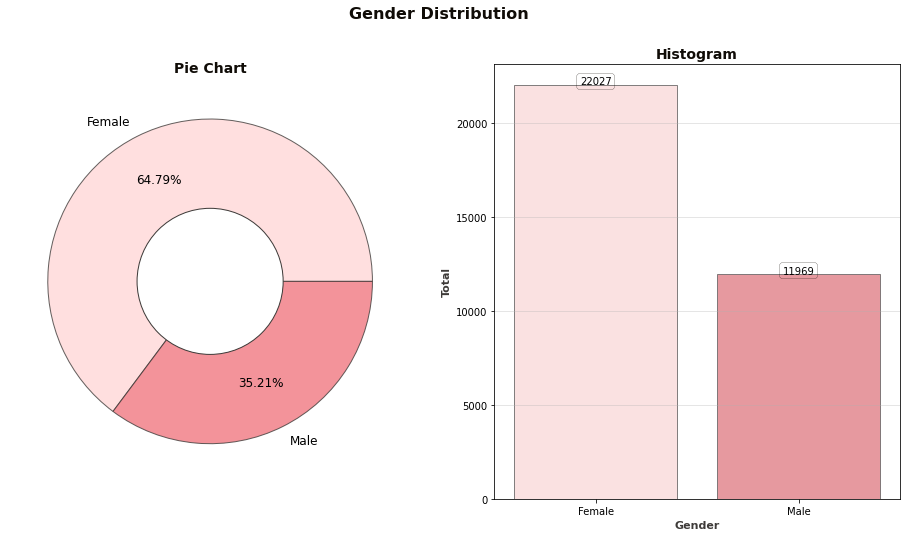

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=new_data['gender'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Gender Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(new_data['gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='gender', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
new_data.gender.value_counts(dropna=False)

From above graphs, we can see that females have more chances of getting cardiovascular disease.

*************************
.: Glucose Total :.
*************************


1    27789
3     3223
2     2984
Name: gluc, dtype: int64

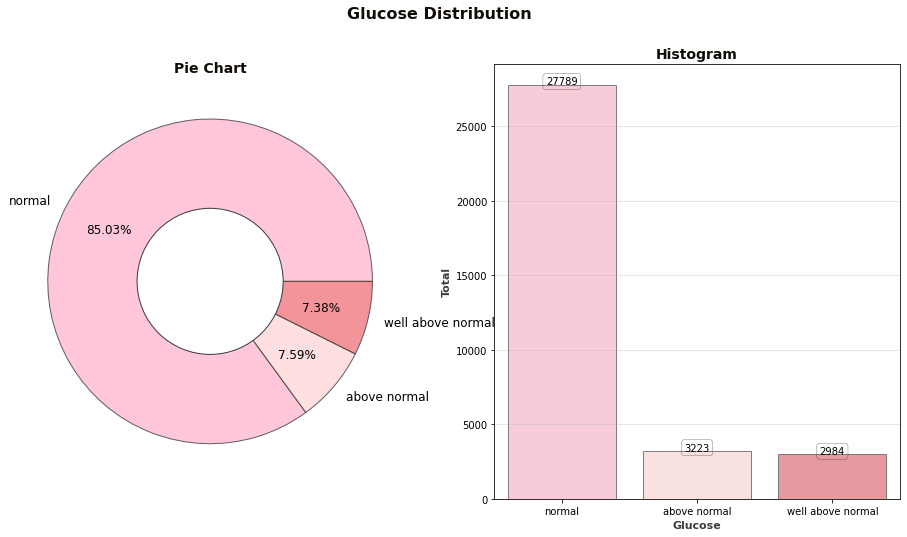

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[1:4]
labels=['normal', 'above normal','well above normal']
order=new_data['gluc'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Glucose Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['gluc'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='gluc', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Glucose', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Glucose Total :.'+'\033[0m')
print('*' * 25)
new_data.gluc.value_counts(dropna=False)

people with normal glucose level tend to have more chances of getting cardiovascular disease

*************************
.: cholesterol Total :.
*************************


1    22440
3     6007
2     5549
Name: cholesterol, dtype: int64

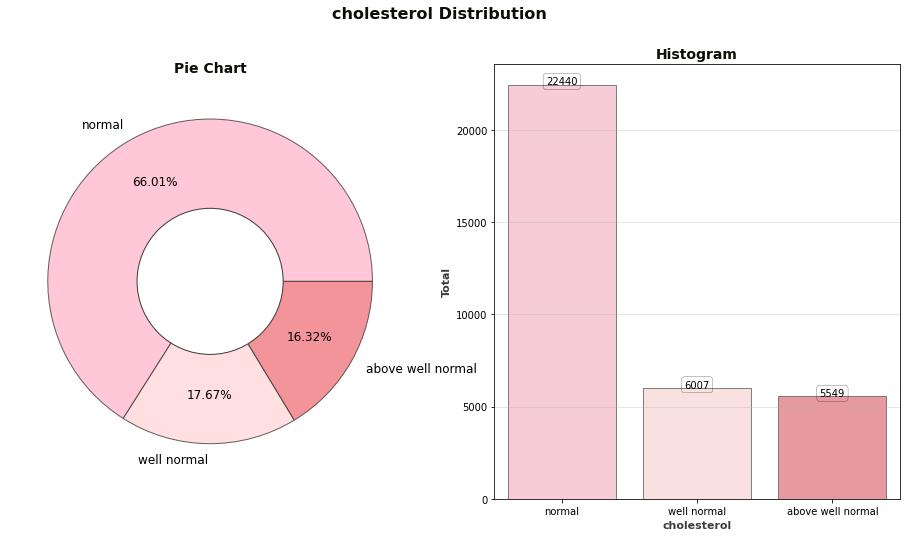

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[1:4]
labels=['normal', 'well normal','above well normal']
order=new_data['cholesterol'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('cholesterol Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(new_data['cholesterol'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='cholesterol', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('cholesterol', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: cholesterol Total :.'+'\033[0m')
print('*' * 25)
new_data.cholesterol.value_counts(dropna=False)

people with normal cholestrol levle tend to have more chances of getting cardiovascular disease

*************************
.: smoking Total :.
*************************


0    62680
1     6043
Name: smoke, dtype: int64

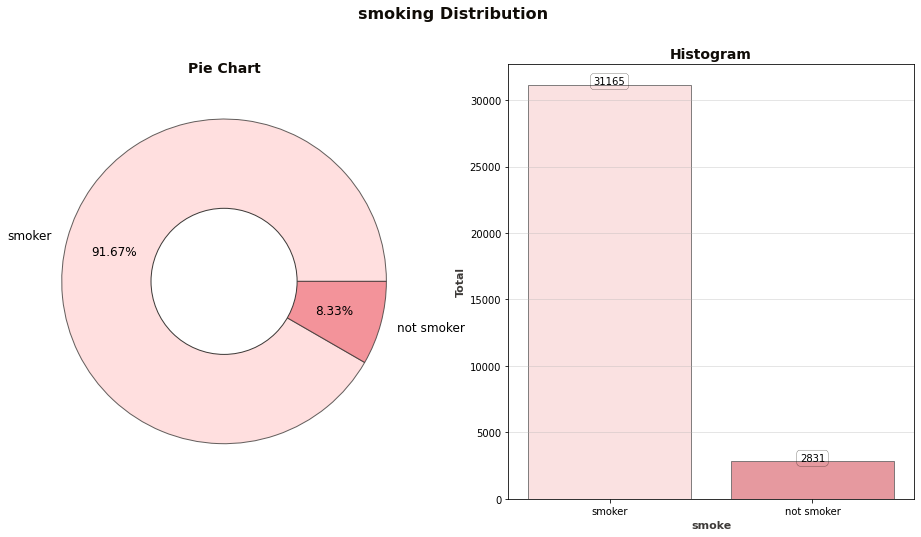

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['smoker', 'not smoker']
order=new_data['smoke'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('smoking Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(new_data['smoke'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='smoke', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('smoke', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: smoking Total :.'+'\033[0m')
print('*' * 25)
data.smoke.value_counts(dropna=False)

In [ ]:
o1 = len(data[(data['smoke'] == 1)])
o2 = len(data[(data['smoke'] == 0)])
print(o1,o2)

6043 62680


People who smokes tends to have more chances of getting cardiovascular disease

*************************
.: alcohol Total :.
*************************


0    32249
1     1747
Name: alco, dtype: int64

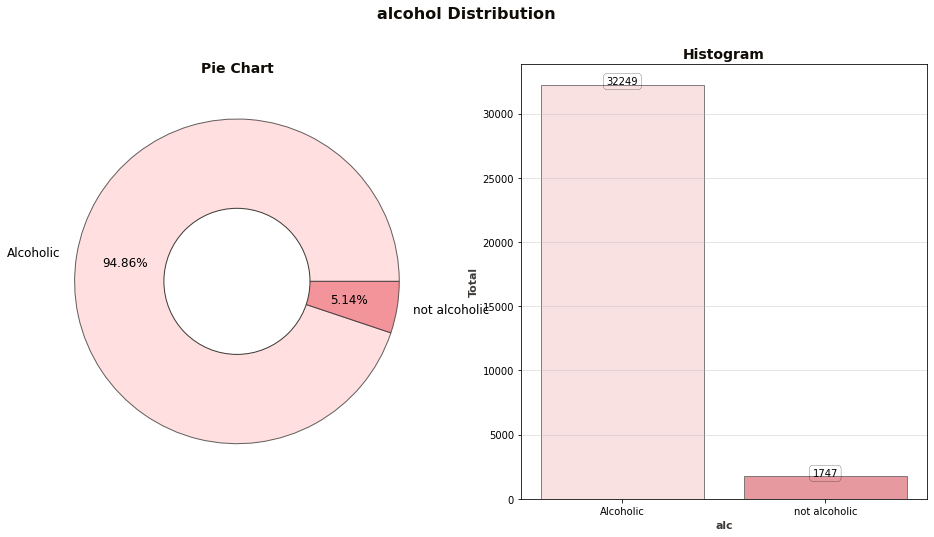

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Alcoholic','not alcoholic']
order=new_data['alco'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('alcohol Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(new_data['alco'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='alco', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('alc', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: alcohol Total :.'+'\033[0m')
print('*' * 25)
new_data.alco.value_counts(dropna=False)

people who drinks have more chances of getting cardiovascular disease

*************************
.: Physical Activity Total :.
*************************


1    26802
0     7194
Name: active, dtype: int64

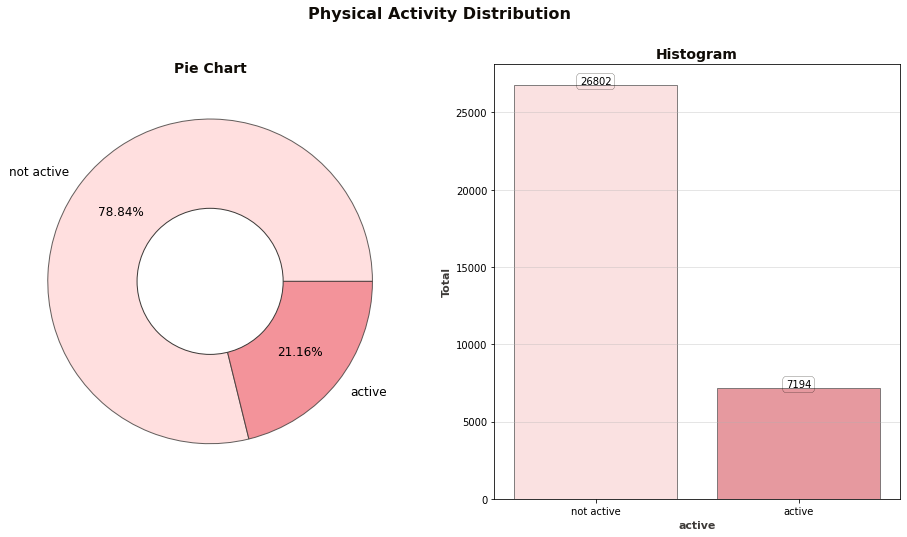

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['not active','active']
order=new_data['active'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Physical Activity Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(new_data['active'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='active', data=new_data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('active', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Physical Activity Total :.'+'\033[0m')
print('*' * 25)
new_data.active.value_counts(dropna=False)

*************************
.: Affected person  :.
*************************


0    34727
1    33996
Name: cardio, dtype: int64

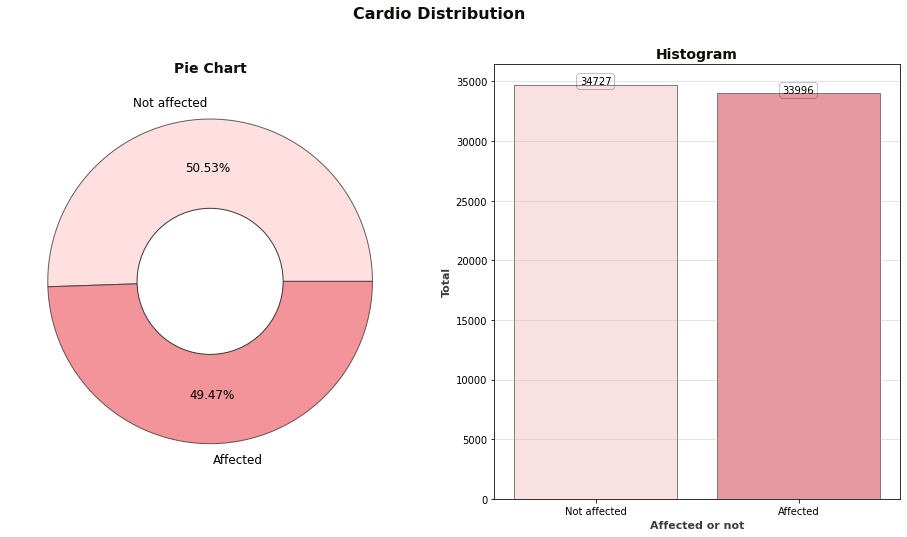

In [ ]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Not affected', 'Affected']
order=data['cardio'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Cardio Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['cardio'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='cardio', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Affected or not', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Affected person  :.'+'\033[0m')
print('*' * 25)
data.cardio.value_counts(dropna=False)

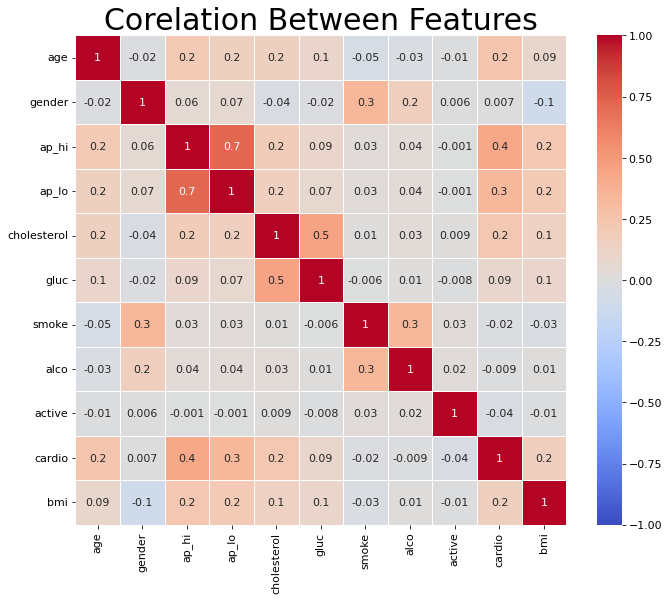

In [ ]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

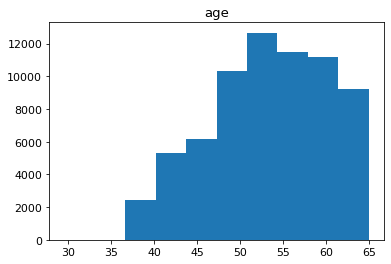

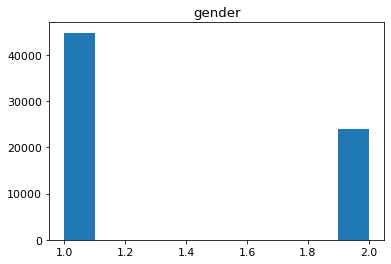

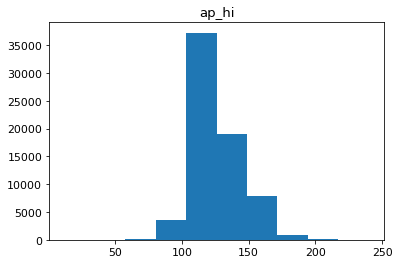

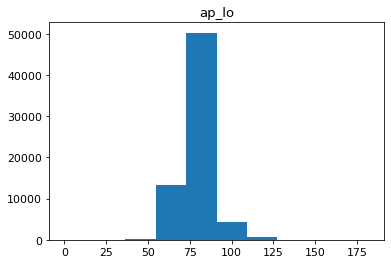

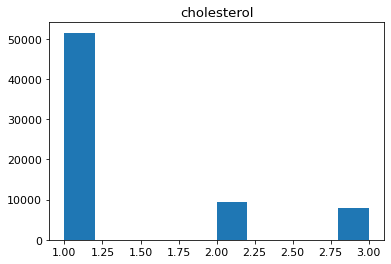

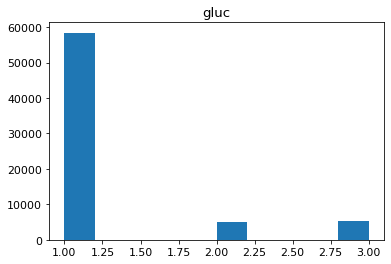

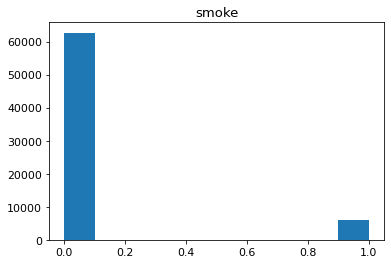

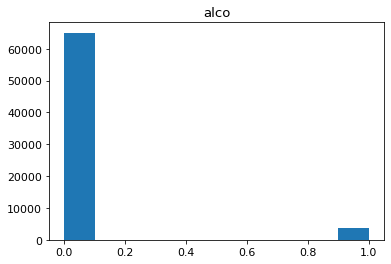

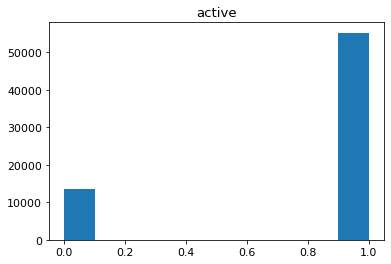

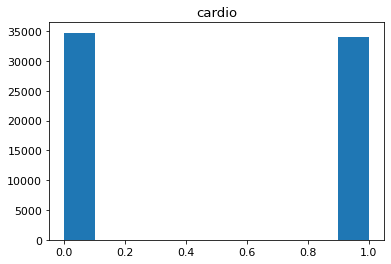

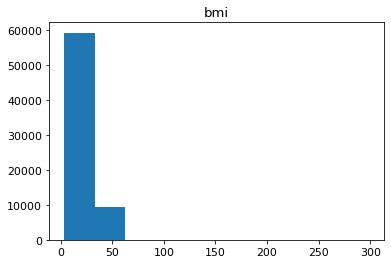

In [ ]:
for i in data.columns:    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(data[i])

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# x = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values
y = data['cardio']
x = data.drop(['cardio'],axis=1)
print(x)
print(y)

             age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      50.391781       2    110     80            1     1      0     0   
1      55.419178       1    140     90            3     1      0     0   
2      51.663014       1    130     70            3     1      0     0   
3      48.282192       2    150    100            1     1      0     0   
4      47.873973       1    100     60            1     1      0     0   
...          ...     ...    ...    ...          ...   ...    ...   ...   
69995  52.712329       2    120     80            1     1      1     0   
69996  61.920548       1    140     90            2     2      0     0   
69997  52.235616       2    180     90            3     1      0     1   
69998  61.454795       1    135     80            1     2      0     0   
69999  56.273973       1    120     80            2     1      0     0   

       active        bmi  
0           1  21.967120  
1           1  34.927679  
2           0  23.507805  
3  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(solver='lbfgs',max_iter=3000)
clf.fit(x_train, y_train)
y_pred_lg = clf.predict(x_test)
acc_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy: ", acc_lg)

Accuracy:  0.7279010549290651


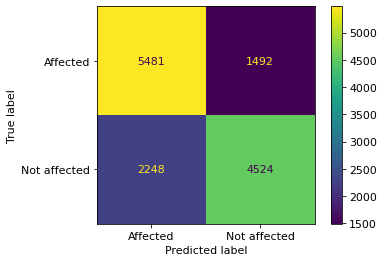

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_lg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)

print("Precision: {:.2f}".format(precision_lg))
print("Recall: {:.2f}".format(recall_lg))
print("F1 Score: {:.2f}".format(f1_lg))

Precision: 0.75
Recall: 0.67
F1 Score: 0.71


In [ ]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_knn = KNNClassifier.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy: ", acc_knn)

Accuracy:  0.6792288104765369


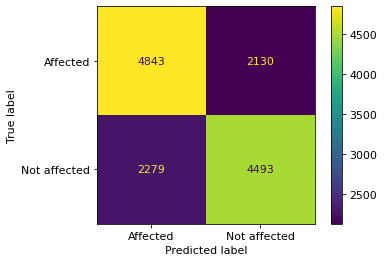

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))
print("F1 Score: {:.2f}".format(f1_knn))

Precision: 0.68
Recall: 0.66
F1 Score: 0.67


In [ ]:
SVMclassifier = SVC()
SVMclassifier.fit(x_train, y_train)

y_pred_svm = SVMclassifier.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", acc_svm)

Accuracy:  0.7229538013823208


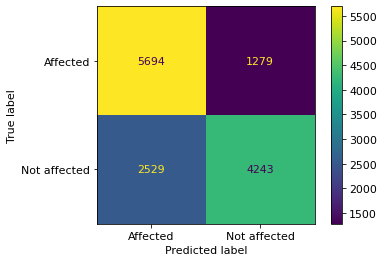

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Precision: {:.2f}".format(precision_svm))
print("Recall: {:.2f}".format(recall_svm))
print("F1 Score: {:.2f}".format(f1_svm))

Precision: 0.77
Recall: 0.63
F1 Score: 0.69


In [ ]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_gnb = GNBclassifier.predict(x_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy: ", acc_gnb)

Accuracy:  0.7080392870134594


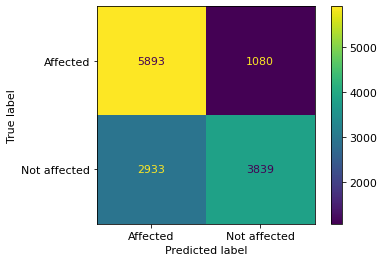

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_gnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print("Precision: {:.2f}".format(precision_gnb))
print("Recall: {:.2f}".format(recall_gnb))
print("F1 Score: {:.2f}".format(f1_gnb))

Precision: 0.78
Recall: 0.57
F1 Score: 0.66


In [ ]:
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=42)

DTCclassifier.fit(x_train, y_train)
y_pred_dtc = DTCclassifier.predict(x_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy: ", acc_dtc)

Accuracy:  0.6197162604583485


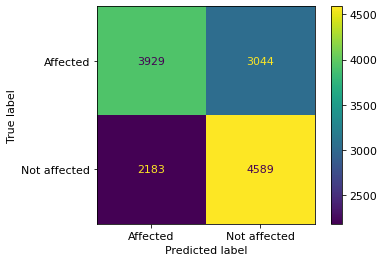

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_dtc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

print("Precision: {:.2f}".format(precision_dtc))
print("Recall: {:.2f}".format(recall_dtc))
print("F1 Score: {:.2f}".format(f1_dtc))

Precision: 0.60
Recall: 0.68
F1 Score: 0.64


In [ ]:

RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_rf = RFclassifier.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: ", acc_rf)

Accuracy:  0.7280465623863223


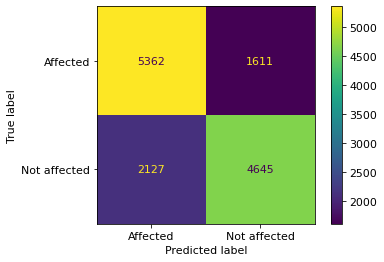

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))
print("F1 Score: {:.2f}".format(f1_rf))

Precision: 0.74
Recall: 0.69
F1 Score: 0.71


In [ ]:
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(x_train, y_train)
y_pred_et = ETclassifier.predict(x_test)
acc_et = accuracy_score(y_test, y_pred_et)
print("Accuracy: ", acc_et)

Accuracy:  0.6828664969079665


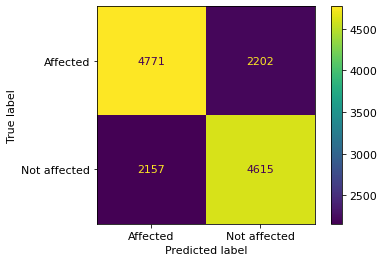

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_et)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_et = precision_score(y_test, y_pred_et)
recall_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)

print("Precision: {:.2f}".format(precision_et))
print("Recall: {:.2f}".format(recall_et))
print("F1 Score: {:.2f}".format(f1_et))

Precision: 0.68
Recall: 0.68
F1 Score: 0.68


In [ ]:
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_gb = GBclassifier.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy: ", acc_gb)

Accuracy:  0.7304474354310658


In [ ]:
import pickle
pickle.dump(GBclassifier, open("model.pkl", "wb"))


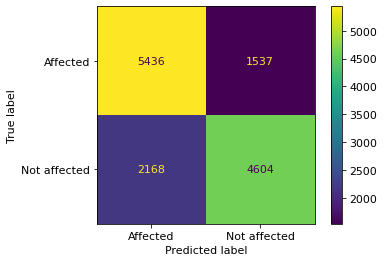

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_gb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Precision: {:.2f}".format(precision_gb))
print("Recall: {:.2f}".format(recall_gb))
print("F1 Score: {:.2f}".format(f1_gb))

Precision: 0.75
Recall: 0.68
F1 Score: 0.71


In [ ]:
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_ab = ABclassifier.predict(x_test)
acc_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy: ", acc_ab)

Accuracy:  0.7099308839578028


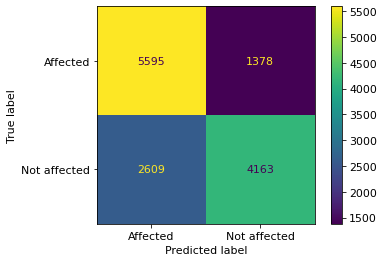

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_ab)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)

print("Precision: {:.2f}".format(precision_ab))
print("Recall: {:.2f}".format(recall_ab))
print("F1 Score: {:.2f}".format(f1_ab))

Precision: 0.75
Recall: 0.61
F1 Score: 0.68


In [ ]:
lda = LinearDiscriminantAnalysis(solver='lsqr', store_covariance=True)
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy: ", acc_lda)

Accuracy:  0.7251364132411786


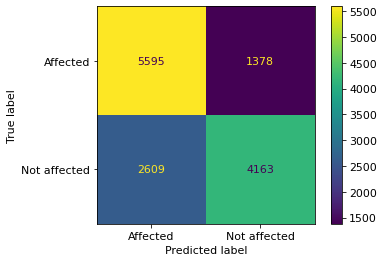

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_ab)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Affected','Not affected'])
cm_display.plot()
plt.show()

In [ ]:
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print("Precision: {:.2f}".format(precision_lda))
print("Recall: {:.2f}".format(recall_lda))
print("F1 Score: {:.2f}".format(f1_lda))

Precision: 0.76
Recall: 0.65
F1 Score: 0.70


In [ ]:
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Classifier',' Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest','GradientBoostingClassifier',
              'AdaBoostClassifier', 'ExtraTreesClassifier','Linear Discriminant Analysis'],
    'Accuracy': [acc_lg, acc_svm, acc_knn, acc_gnb, acc_dtc, acc_rf, acc_gb, acc_ab,acc_et,acc_lda]
    })

models

,Model,Accuracy
0,Logistic Regression,0.727901
1,Support Vector Classifier,0.722954
2,Nearest Neighbor,0.679229
3,Gaussian Naive Bayes,0.708039
4,Decision Tree,0.619716
5,Random Forest,0.728047
6,GradientBoostingClassifier,0.730447
7,AdaBoostClassifier,0.709931
8,ExtraTreesClassifier,0.682866
9,Linear Discriminant Analysis,0.725136


In [ ]:
tpr_weight = 0.25
model1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Classifier',' Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest','GradientBoostingClassifier',
              'AdaBoostClassifier', 'ExtraTreesClassifier','Linear Discriminant Analysis'],
    'Accuracy': [acc_lg, acc_svm, acc_knn, acc_gnb, acc_dtc, acc_rf, acc_gb, acc_ab,acc_et,acc_lda],

     'Type': ['Accuracy', 'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy']
    })

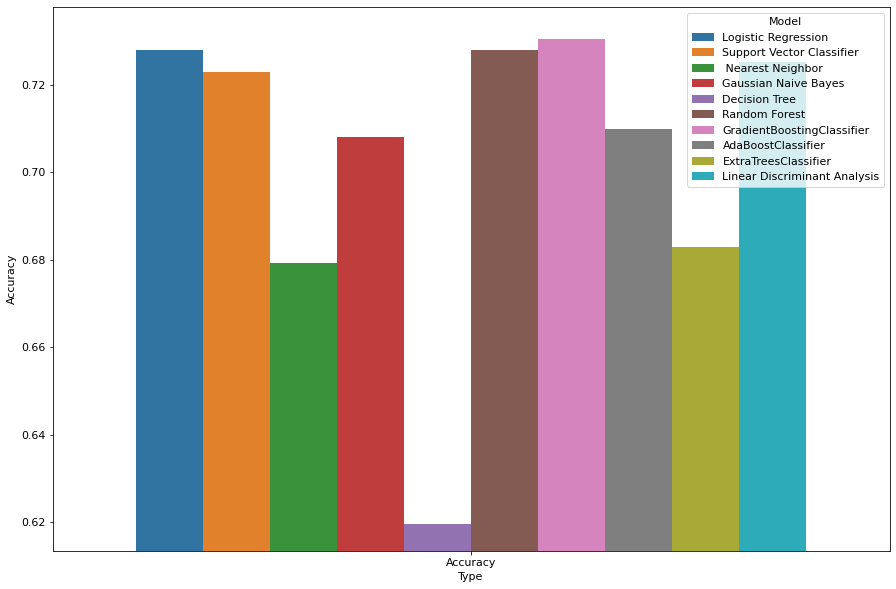

In [ ]:


plt.figure(figsize=(15,10))
sns.barplot(y=model1['Accuracy'],x=model1['Type'], hue=model1['Model'], orient ="v")
plt.ylim(min(model1['Accuracy'])* 0.99, max(model1['Accuracy'])*1.01)
plt.show()

Gradient Boosting Classifier have more accuracy than any model of 0.7329